In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import scale

In [6]:
#load the data
traindata = pd.read_csv("adult.data",names=['age','workclass','fnlwgt','education',' education-num',
'marital_status','occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native_country','income'])
testdata = pd.read_csv("adult.test",names=['age','workclass','fnlwgt','education',' education-num',
'marital_status','occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native_country','income'],skiprows=1)

In [7]:
start_time = time.time() #start time

In [8]:
#remove the NaN value
train_remove = traindata.replace(' ?', np.nan).dropna()
test_remove = testdata.replace(' ?', np.nan).dropna()


In [9]:
#replace the data in test set
test_remove['income'] = test_remove.income.replace({' <=50K.': ' <=50K', ' >50K.': ' >50K'})

In [10]:
# convert into numbers 
for feature in train_remove.columns: # Loop through all columns in the dataframe
    if train_remove[feature].dtype == 'object': # Only apply for columns with categorical strings
        train_remove[feature] = pd.Categorical(train_remove[feature]).codes # Replace strings with an integer
for feature in test_remove.columns: # Loop through all columns in the dataframe
    if test_remove[feature].dtype == 'object': # Only apply for columns with categorical strings
        test_remove[feature] = pd.Categorical(test_remove[feature]).codes # Replace strings with an integer

In [11]:
#reindex the dataframe
newindex = range(len(train_remove))
train_remove['c'] = newindex
train_remove = train_remove.set_index('c')

In [12]:
#splict the label and data
trainlabel = train_remove.pop('income')
testlabel = test_remove.pop('income')

In [13]:
#standardizing the data
traindata = scale(train_remove)
testdata = scale (test_remove)

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


In [14]:
kf = KFold(n_splits=10,shuffle=False)
forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1) #define the randomforest classifier
accuracy = []
for train,test in kf.split(traindata):
    Train_Set = traindata[train]
    TrainLabel = (trainlabel[train])
    Test_Set = traindata[test]
    TestLabel = trainlabel[test]
    forest.fit(Train_Set, TrainLabel) #train the classifier
    predict_label = forest.predict(Test_Set) # predict the label 
    cm = confusion_matrix(TestLabel, predict_label) #confusion matrix
    print (classification_report(TestLabel, predict_label))
    print('accuracy:',accuracy_score(TestLabel, predict_label))
    print(cm)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2236
           1       0.74      0.62      0.67       781

   micro avg       0.84      0.84      0.84      3017
   macro avg       0.81      0.77      0.79      3017
weighted avg       0.84      0.84      0.84      3017

accuracy: 0.8442161087172688
[[2061  175]
 [ 295  486]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2289
           1       0.74      0.62      0.68       728

   micro avg       0.86      0.86      0.86      3017
   macro avg       0.81      0.78      0.79      3017
weighted avg       0.85      0.86      0.85      3017

accuracy: 0.8568114020550216
[[2131  158]
 [ 274  454]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2309
           1       0.71      0.61      0.66       707

   micro avg       0.85      0.85      0.85      3016
   macro avg    

In [15]:
print("--- %s seconds ---" % (time.time() - start_time)) #runtime

--- 124.95970702171326 seconds ---


In [16]:
# predict the data in the test set  and show the result 
predict_test = forest.predict(testdata)
cm = confusion_matrix(testlabel, predict_test)
print (classification_report(testlabel, predict_test))
print('accuracy:',accuracy_score(testlabel, predict_test))
print(cm)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.72      0.61      0.66      3700

   micro avg       0.85      0.85      0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

accuracy: 0.8477423638778221
[[10495   865]
 [ 1428  2272]]


AUC Score : 0.901905


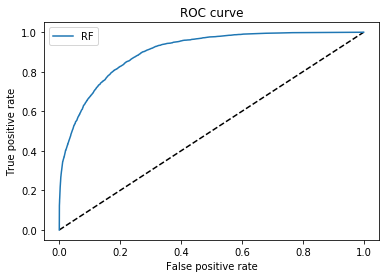

In [17]:
#calculate the auc score and draw the roc curve
y_pred_rf = forest.predict_proba(testdata)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(testlabel, y_pred_rf)
print("AUC Score : %f" %roc_auc_score(testlabel, y_pred_rf))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Text(0,0.5,'Feature Importance Score')

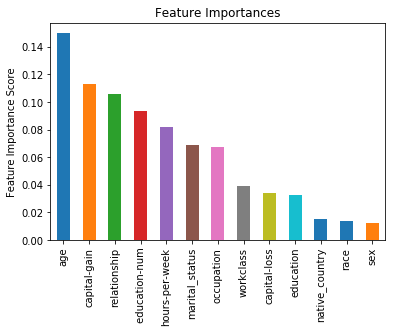

In [18]:
#show the feature importance
feat_imp = pd.Series(forest.feature_importances_,index =['age','workclass','fnlwgt','education',' education-num',
'marital_status','occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native_country']).sort_values(ascending=False)
feat_imp = feat_imp.drop('fnlwgt')
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')